# ASTRO 533 - Project 2

**Created:** Sep. 2020   
**Last Edit:** Sep. 2020  

**Author:** Bill Chen  
**Email:** ybchen@umich.edu  

*Note: some codes are borrowed from Eric*

## Load packages and read data

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.table import Table as tb
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Anglesfrom astropy.coordinates 
import astropy.units as u
plt.style.use('bill')

gaiarv_cat = tb.read('../glt13.fits', format='fits')
gaiarv_cat_m22 = tb.read('./glt19_m22.fits', format='fits')

## Find Pleiades

In [2]:
# selection criteria is the same as project 1

m45ra = 15 * (3 + (47/60) + (24/3600)) # RA = 3h 47m 24s
m45dec = 24 + (7/60) + (0/3600) # Dec = 24deg 7min 0sec

m45_index, = np.where((abs(gaiarv_cat['ra']-m45ra) < 3) & (abs(gaiarv_cat['dec']-m45dec) < 3) &
                       (abs(gaiarv_cat['pmra']-20) < 5) & (abs(gaiarv_cat['pmdec']+45) < 5) &
                       (abs(gaiarv_cat['parallax']-7.3) < 0.7))
print('Number of candidates:', len(m45_index))

c:\users\bill\appdata\local\programs\python\python36\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)


Number of candidates: 250


In [3]:
# distance estimation

d_m45 = 1000 / (gaiarv_cat['parallax'][m45_index]) # pc
print('Estimation of mean distance (in pc):', np.mean(d_m45))

Estimation of mean distance (in pc): 136.49794481021672


## Find M22

In [4]:
# final selection criteria is the same as project 1

m22_index, = np.where((abs(gaiarv_cat_m22['pmra']-10) < 1) & (abs(gaiarv_cat_m22['pmdec']+5.5) < 1))
print('Number of candidates:', len(m22_index))

Number of candidates: 4103


## Color-magnitude diagrams

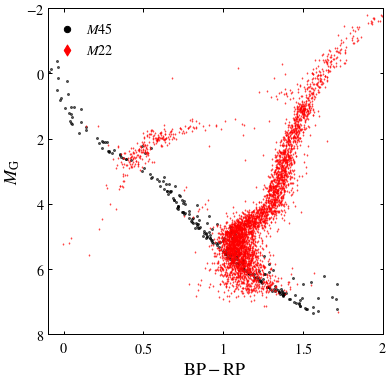

In [5]:
fig, ax = plt.subplots(figsize=(6,6))

d_m22 = 3 # kpc
absmag_m45 = gaiarv_cat['phot_g_mean_mag'][m45_index] - 5*np.log10(d_m45/10) # absolute magnitude of m45
absmag_m22 = gaiarv_cat_m22['phot_g_mean_mag'][m22_index] - 5*np.log10(d_m22*1000/10) # absolute magnitude of m22

ax.scatter(gaiarv_cat['bp_rp'][m45_index], absmag_m45, c='k', s=4, alpha=0.6, label=None)
ax.scatter(gaiarv_cat_m22['bp_rp'][m22_index], absmag_m22, marker='d', c='r', s=1, alpha=0.6, label=None)

ax.set_xlabel(r'$\mathrm{BP-RP}$')
ax.set_ylabel(r'$M_\mathrm{G}$')
ax.set_xlim(-0.1, 2)
ax.set_ylim(8, -2)
ax.set_xticks([0, 0.5, 1, 1.5, 2])
ax.set_xticklabels([r'$0$', r'$0.5$', r'$1$', r'$1.5$', r'$2$'])
ax.set_yticks([-2, 0, 2, 4, 6, 8])
ax.set_yticklabels([r'$-2$', r'$0$', r'$2$', r'$4$', r'$6$', r'$8$'])

ax.scatter([], [], c='k', s=40, label=r'$M45$')
ax.scatter([], [], c='r', s=60, marker='d', label=r'$M22$')
plt.legend(loc=2)

plt.savefig('./figures/color-M.pdf')
plt.show()

## Histogram of the absolute magnitudes of M22

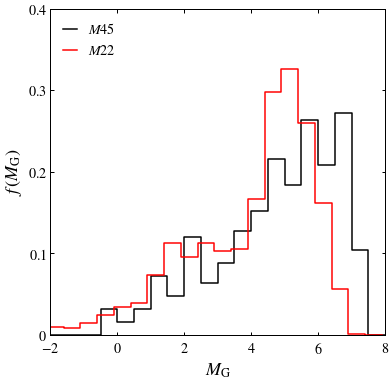

In [6]:
fig, ax = plt.subplots(figsize=(6,6))

bin_edges = np.linspace(-2, 8, 21)
hist_m45, bin_edges = np.histogram(absmag_m45, density=True, bins=bin_edges)
hist_m22, bin_edges = np.histogram(absmag_m22, density=True, bins=bin_edges)
# hist_m22 = hist_m22 * len(m45_index) / len(m22_index)

# ax.scatter((bin_edges[:-1]+bin_edges[1:])/2, hist, c='k', s=4, alpha=0.6, label=None)
ax.step(bin_edges, np.append(hist_m45[0], hist_m45), c='k')
ax.step(bin_edges-0.1, np.append(hist_m22[0], hist_m22), c='r')

ax.set_xlabel(r'$M_\mathrm{G}$')
ax.set_ylabel(r'$f\,(M_\mathrm{G})$')
ax.set_xlim(-2, 8)
# ax.set_ylim(0, 45)
ax.set_ylim(0, 0.4)
ax.set_xticks([-2, 0, 2, 4, 6, 8])
ax.set_xticklabels([r'$-2$', r'$0$', r'$2$', r'$4$', r'$6$', r'$8$'])
# ax.set_yticks([0, 10, 20, 30, 40])
# ax.set_yticklabels([r'$0$', r'$10$', r'$20$', r'$30$', r'$40$'])
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4])
ax.set_yticklabels([r'$0$', r'$0.1$', r'$0.2$', r'$0.3$', r'$0.4$'])

ax.plot([], [], c='k', label=r'$M45$')
ax.plot([], [], c='r', label=r'$M22$')
plt.legend(loc=2)

plt.savefig('./figures/M-histogram.pdf')
plt.show()

## Combined plot

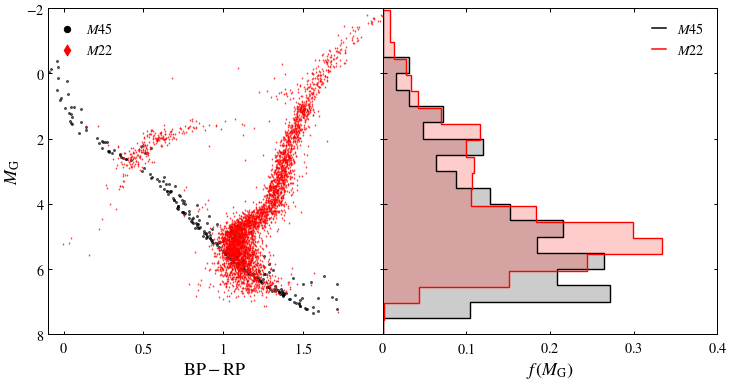

In [7]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(12,6),sharey=True)
fig.subplots_adjust(wspace=0)


ax1.scatter(gaiarv_cat['bp_rp'][m45_index], absmag_m45, c='k', s=4, alpha=0.6, label=None)
ax1.scatter(gaiarv_cat_m22['bp_rp'][m22_index], absmag_m22, marker='d', c='r', s=1, alpha=0.6, label=None)

ax1.set_xlabel(r'$\mathrm{BP-RP}$')
ax1.set_ylabel(r'$M_\mathrm{G}$')
ax1.set_xlim(-0.1, 2)
ax1.set_ylim(8, -2)
ax1.set_xticks([0, 0.5, 1, 1.5])
ax1.set_xticklabels([r'$0$', r'$0.5$', r'$1$', r'$1.5$'])
ax1.set_yticks([-2, 0, 2, 4, 6, 8])
ax1.set_yticklabels([r'$-2$', r'$0$', r'$2$', r'$4$', r'$6$', r'$8$'])

ax1.scatter([], [], c='k', s=40, label=r'$M45$')
ax1.scatter([], [], c='r', s=60, marker='d', label=r'$M22$')
ax1.legend(loc=2)

ax2.hist(absmag_m45, bins=bin_edges, density=True, color='k', orientation='horizontal', histtype='stepfilled',
         label=None, alpha=0.2)
ax2.hist(absmag_m22, bins=bin_edges+0.05, density=True, color='r', orientation='horizontal', histtype='stepfilled',
         label=None, alpha=0.2)

ax2.hist(absmag_m45, bins=bin_edges, density=True, color='k', orientation='horizontal', histtype='step',
         linewidth=1.4, label=None)
ax2.hist(absmag_m22, bins=bin_edges+0.05, density=True, color='r', orientation='horizontal', histtype='step',
         linewidth=1.4, label=None)

ax2.set_xlabel(r'$f\,(M_\mathrm{G})$')
ax2.set_xlim(0, 0.4)
ax2.set_xticks([0, 0.1, 0.2, 0.3, 0.4])
ax2.set_xticklabels([r'$0$', r'$0.1$', r'$0.2$', r'$0.3$', r'$0.4$'])

ax2.plot([], [], c='k', label=r'$M45$')
ax2.plot([], [], c='r', label=r'$M22$')
ax2.legend(loc=1)

plt.savefig('./figures/combined.pdf')
plt.show()